In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set()
# caffeine / no caffein --> study hour
data_a = np.array([3, 4, 5, 4]) # Caffeine
data_b = np.array([1, 2, 3, 2]) # No Caffeine
df = pd.DataFrame({'Days': np.arange(1, len(data_a)+len(data_b)+1),
                           'Study hour': np.hstack((data_a, data_b)),
                           'Caffeine intake': ['Caffeine']*len(data_a) + ['No Caffeine']*len(data_b)})
df
print(df)

   Days  Study hour Caffeine intake
0     1           3        Caffeine
1     2           4        Caffeine
2     3           5        Caffeine
3     4           4        Caffeine
4     5           1     No Caffeine
5     6           2     No Caffeine
6     7           3     No Caffeine
7     8           2     No Caffeine


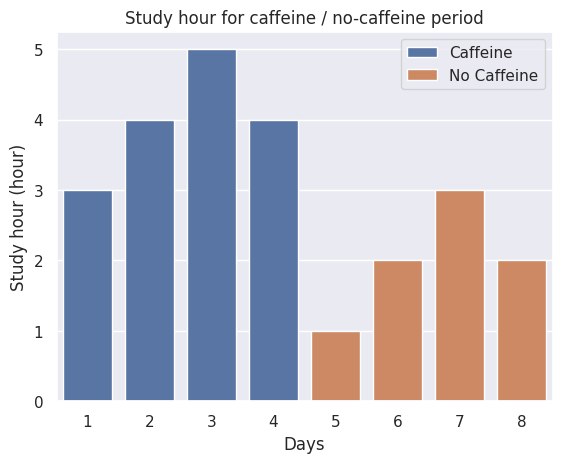

In [4]:
plt.figure()
# sns.barplot(data=df, x='Days', y='Study hour', color='steelblue')
sns.barplot(data=df, x='Days', y='Study hour', hue='Caffeine intake', dodge=False)
plt.ylabel('Study hour (hour)')
plt.title('Study hour for caffeine / no-caffeine period')
plt.legend()
plt.show()

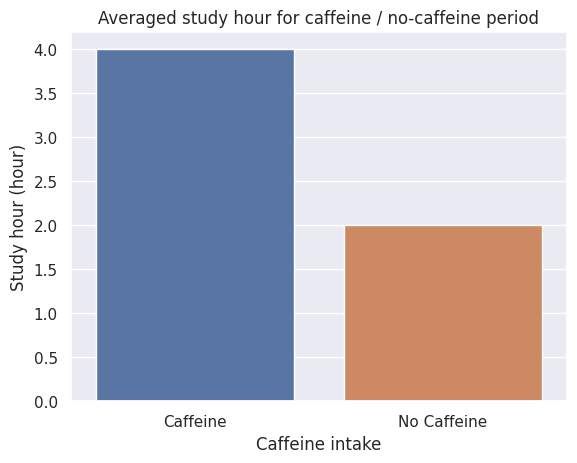

In [ ]:
plt.figure()
sns.barplot(data=df, x='Caffeine intake', y='Study hour', hue='Caffeine intake', errorbar=None, estimator=np.mean)
plt.ylabel('Study hour (hour)')
plt.title('Averaged study hour for caffeine / no-caffeine period')
plt.show()

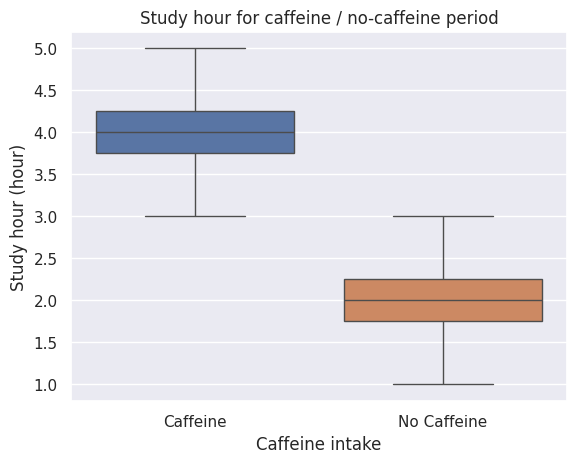

In [ ]:
plt.figure()
sns.boxplot(data=df, x='Caffeine intake', hue='Caffeine intake', y='Study hour')
plt.ylabel('Study hour (hour)')
plt.title('Study hour for caffeine / no-caffeine period')
plt.show()

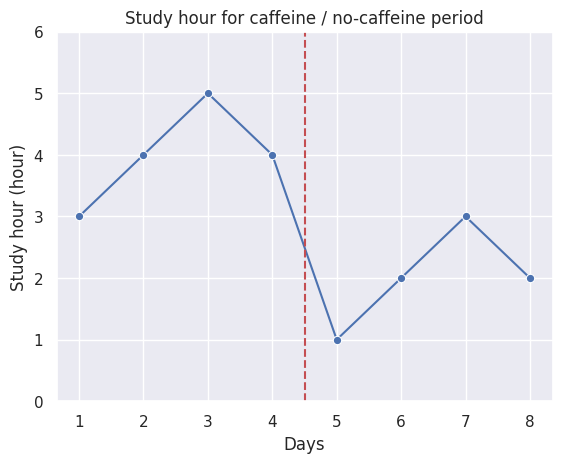

In [ ]:
plt.figure()
sns.lineplot(data=df, x='Days', y='Study hour', marker='o')#, hue='Caffeine intake')
plt.ylim([0, 6])
plt.axvline(4.5, linestyle='--', color='r')
plt.ylabel('Study hour (hour)')
plt.title('Study hour for caffeine / no-caffeine period')
plt.show()

In [5]:

from scipy.stats import ttest_ind

print(ttest_ind(data_a, data_b))

TtestResult(statistic=3.464101615137755, pvalue=0.013399964712331038, df=6.0)


In [ ]:
from scipy.stats import linregress
data_ca = [95, 180, 200, 90, 40, 20, 50, 30]
df = pd.DataFrame({'Days': np.arange(1, len(data_a)+len(data_b)+1),
                           'Study hour': np.hstack((data_a, data_b)),
                           'Caffeine amount': data_ca})
df

,Days,Study hour,Caffeine amount
0,1,3,95
1,2,4,180
2,3,5,200
3,4,4,90
4,5,1,40
5,6,2,20
6,7,3,50
7,8,2,30


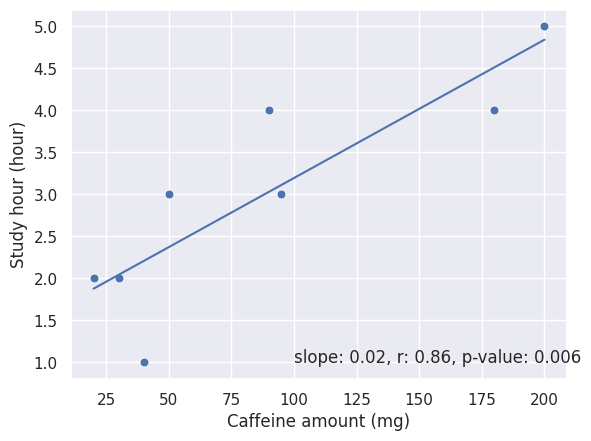

In [ ]:
plt.figure()
sns.scatterplot(data=df, x='Caffeine amount', y='Study hour', s=40)
slope, intercept, rvalue, pvalue, _ = linregress(df['Caffeine amount'], df['Study hour'])
x_val = np.linspace(min(data_ca), max(data_ca), 100)
plt.plot(x_val, x_val*slope + intercept)
plt.xlabel('Caffeine amount (mg)')
plt.ylabel('Study hour (hour)')
plt.annotate('slope: {:.2f}, r: {:.2f}, p-value: {:.3f}'.format(slope, rvalue, pvalue), (100, 1))
plt.show()
